In [149]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [101]:
#Loading the Szeget Weather dataset .csv as a pandas dataframe, into the variable df
df = pd.read_csv('Data/WeatherHistory.csv', sep = ',', header = 0)

print(f'The dimensions of the raw dataset are {df.shape[0]} rows by {df.shape[1]} columns.')
df.head()

The dimensions of the raw dataset are 96453 rows by 12 columns.


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [102]:
#Renaming mis-spelt field in original .csv
df = df.rename(columns={'Loud Cover': 'Cloud Cover'})
df = df.rename(columns={'Pressure (millibars)': 'Pressure'})
df = df.rename(columns={'Visibility (km)': 'Visibility'})

## **Data Description:** ##

### **Attributes:** ###
Below are the attributes, their respective units and data types. 

*Date/Time* (year-month-day hour) : minute : second  
*Summary* (type of weather), discrete  
*Precip Type* (type of precipitation), discrete  
*Temperature outside* (Celsius), continuous  
*Apparent Temperature* (Celsius), continuous  
*Humidity outside* (0.00 - 1.00), continuous    
*Wind speed* (km/h), continuous  
*Wind Bearing* (degrees), continuous
*Visibility* (km), continuous    
*Cloud Cover* N/A  
*Pressure* (millibars), continous    
*Daily Summary* (type of weather), continuous  

 



**Basic exploratory statistics:**

In [103]:
df.describe()
#df[['Temperature (C)', 'Humidity', 'Visibility']].describe() #relevant

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility,Cloud Cover,Pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


A few things can be seen from the above to inform the subsequent cleaning.  
- Firstly the attribute Cloud Cover has statistics that are full of zeros so we can remove it.  
- Secondly, there are some suspicious min. values of exactly zero which are very unlikely - for example a humidity of 0 is impossible in an outdoor environment.
- A Wind Speed of exactly zero is also highly unlikely. We can check later if the wind bearing is zero whenever the wind speed is and conclude whether the wind detector was out of power/disconnected at those times.

In [104]:
#Removing the Cloud Cover attribute from the dataframe
df = df.drop(['Cloud Cover'], axis=1)
print(f'The dimensions of the updated dataset are {df.shape[0]} rows by {df.shape[1]} columns.')

The dimensions of the updated dataset are 96453 rows by 11 columns.


In [105]:
print(df[df['Humidity'] == 0].count() )

Formatted Date              22
Summary                     22
Precip Type                 22
Temperature (C)             22
Apparent Temperature (C)    22
Humidity                    22
Wind Speed (km/h)           22
Wind Bearing (degrees)      22
Visibility                  22
Pressure                    22
Daily Summary               22
dtype: int64


There are 22 values, so it will be inconsequential to replace them with the mean humidity to allow us to keep those datapoints.

In [106]:
#Checking the number of 0 humidity readings
df[df['Humidity'] == 0] 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility,Pressure,Daily Summary
19958,2008-02-17 14:00:00.000 +0100,Partly Cloudy,snow,-1.111111,-1.111111,0.0,4.4275,12.0,9.982,1043.04,Partly cloudy starting in the morning continui...
28101,2009-12-20 21:00:00.000 +0100,Clear,snow,-15.000000,-15.000000,0.0,3.2200,250.0,9.982,1015.10,Mostly cloudy starting overnight continuing un...
28103,2009-12-20 23:00:00.000 +0100,Clear,snow,-15.555556,-20.150000,0.0,6.4400,160.0,9.982,1015.90,Mostly cloudy starting overnight continuing un...
28110,2009-12-21 06:00:00.000 +0100,Clear,snow,-13.888889,-23.266667,0.0,22.5400,160.0,9.982,1016.80,Mostly cloudy starting in the morning.
29627,2009-01-25 11:00:00.000 +0100,Foggy,rain,1.111111,-3.950000,0.0,20.9300,350.0,0.161,1000.10,Foggy starting overnight continuing until afte...
54840,2012-02-10 00:00:00.000 +0100,Foggy,snow,-15.555556,-15.555556,0.0,3.2200,220.0,3.059,1030.80,Foggy starting in the morning continuing until...
54858,2012-02-10 18:00:00.000 +0100,Foggy,snow,-15.000000,-15.000000,0.0,0.0000,0.0,2.576,1034.40,Foggy starting in the morning continuing until...
54870,2012-02-11 06:00:00.000 +0100,Overcast,snow,-16.111111,-23.027778,0.0,11.2700,20.0,7.084,1029.90,Foggy starting overnight continuing until morn...
54872,2012-02-11 08:00:00.000 +0100,Overcast,snow,-15.000000,-22.738889,0.0,14.4900,30.0,9.982,1029.80,Foggy starting overnight continuing until morn...
54873,2012-02-11 09:00:00.000 +0100,Overcast,snow,-13.888889,-20.350000,0.0,11.2700,40.0,9.982,1029.90,Foggy starting overnight continuing until morn...


In [107]:
#creating new dataframe without the zero humidity values to calculate mean
df2 = df[df.Humidity != 0]
#print(df2.shape)
#df2.describe()
#creating new dataframe without the zero pressure values to calculate mean
df3 = df[df.Pressure != 0]
#df3.describe()
df4 = df[df.Visibility != 0]
df4.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility,Pressure
count,96003.000000,96003.000000,96003.000000,96003.000000,96003.000000,96003.000000,96003.000000
mean,11.961716,10.887262,0.734594,10.812081,187.514432,10.395826,1004.513811
std,9.553251,10.697281,0.195631,6.913250,107.335919,4.141504,111.312221
min,-21.822222,-26.227778,0.000000,0.000000,0.000000,0.016100,0.000000
25%,4.752778,2.344444,0.600000,5.828200,116.000000,8.420300,1011.900000
50%,12.044444,12.044444,0.780000,9.965900,180.000000,10.046400,1016.430000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.876400,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [108]:
#Replacing 0 values with mean humidity calculated excluding the 0 values
df.loc[df.Humidity == 0.0, 'Humidity'] = 0.735067 

Doing the same now with the zero pressure values

In [109]:
print(df[df['Pressure'] == 0].count() ) 

Formatted Date              1288
Summary                     1288
Precip Type                 1288
Temperature (C)             1288
Apparent Temperature (C)    1288
Humidity                    1288
Wind Speed (km/h)           1288
Wind Bearing (degrees)      1288
Visibility                  1288
Pressure                    1288
Daily Summary               1288
dtype: int64


In [110]:
#Replacing the 0 values with the mean pressure calculated excluding the 0 values
df.loc[df.Pressure == 0, 'Pressure'] = 1016.814140 

In [111]:
#Replacing the 0 Visibility values with the mean visibility calculated excluding the 0 values
df.loc[df.Visibility == 0, 'Visibility'] = 10.395826 

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

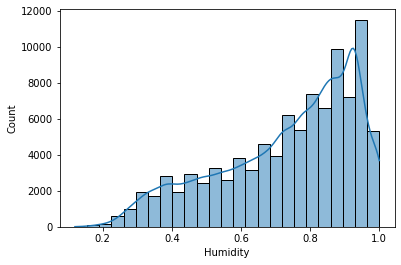

In [112]:
#Distribution of Humidity values
sns.histplot(df, x='Humidity', bins=25, kde=True)

<AxesSubplot:xlabel='Temperature (C)', ylabel='Count'>

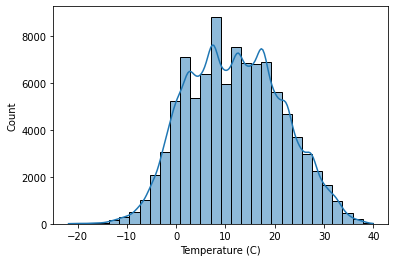

In [113]:
sns.histplot(df, x='Temperature (C)', bins=30, kde=True)

<AxesSubplot:xlabel='Visibility', ylabel='Count'>

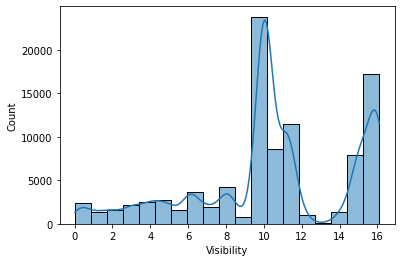

In [114]:
sns.histplot(df, x='Visibility', bins=19, kde=True)

<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

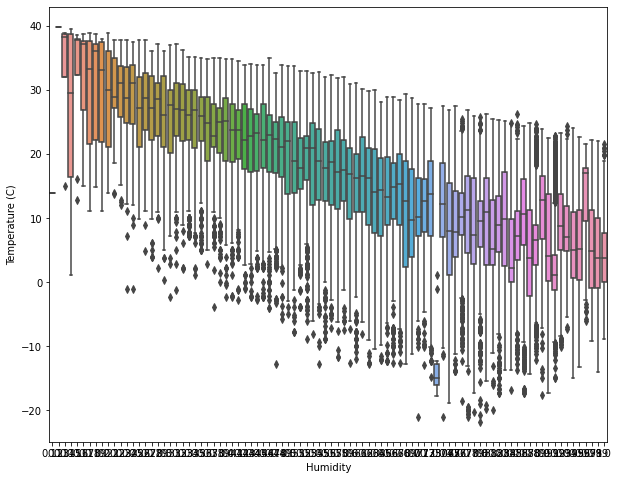

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='Humidity', y='Temperature (C)')

In [17]:
print('Non-numerical value: Precip Type')
precip_type = df.loc[:, 'Precip Type'].describe()
print(precip_type)


Non-numerical value: Precip Type
count     95936
unique        2
top        rain
freq      85224
Name: Precip Type, dtype: object


In [59]:
summary = df.loc[:, 'Summary'].describe()
print(summary)
df.Summary.unique()

count             96453
unique               27
top       Partly Cloudy
freq              31733
Name: Summary, dtype: object


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [80]:
daily_summary = df.loc[:, 'Daily Summary'].describe()
print(daily_summary)

count                                 96453
unique                                  214
top       Mostly cloudy throughout the day.
freq                                  20085
Name: Daily Summary, dtype: object


From the above we notice that there are some missing values (approximately 500) in the 'Precip Type' field. I double-checked that these were 'na' values below.   

In [18]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility                    0
Pressure                      0
Daily Summary                 0
dtype: int64

No reason for these missing values was given by the creators of the dataset, so I'm making the assumption that they did not make the observations for the precipitation types. Now to check the number of unique values that appear within the precipitation type field:

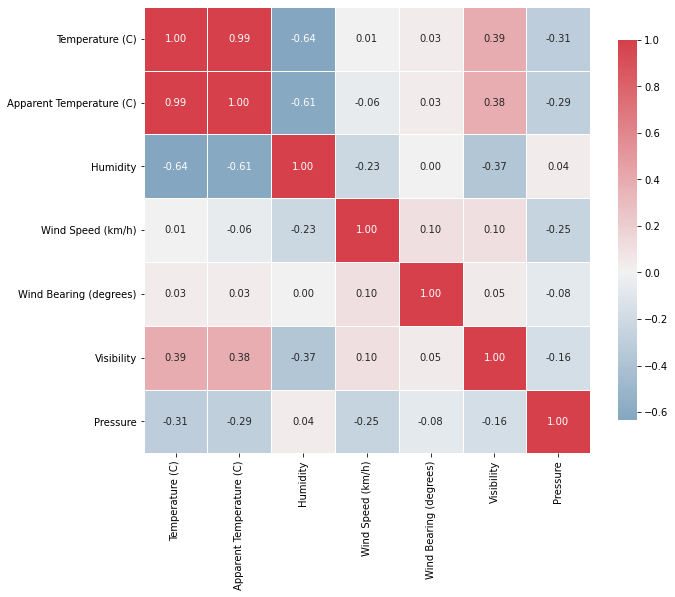

In [29]:
 #Seaborn correlation table taken from Intro_to_DA_with_Python.ipynb from tutorial class
    
    # Add diverging colormap from red to blue #
cmap = sns.diverging_palette(240, 10, 70, as_cmap=True)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .70}, cmap=cmap)
plt.show();

From the above we can observe that Humidity is primarily correlated with Temperature (negatively), closely followed by apparent temperature. There is also a weak negative correlation between visibility and humidity (as would be expected fr) All the other attributes have a more limited correlative effect. The moderate negative correlation between temperature and humidity is displayed below with a scatterplot for all the datapoints.

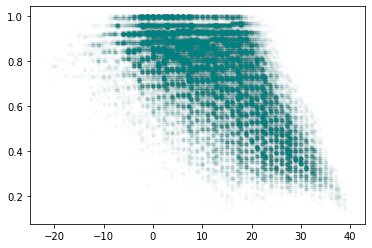

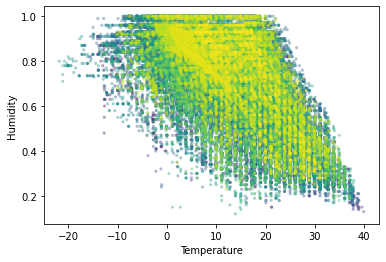

In [27]:
from scipy.stats import gaussian_kde
#Setting up scatterplot for 
xy = np.vstack([df['Temperature (C)'], df['Humidity']])
z = gaussian_kde(xy)(xy) #sorting 

idx = z.argsort()
x, y, z = df['Temperature (C)'], df['Humidity'], z[idx]

plt.scatter( df['Temperature (C)'],  df['Humidity'], s=10,c='teal', alpha = 0.01)
#plt.scatter(df['Temperature (C)'], df['Humidity'], s=1,c='green')

fig, ax = plt.subplots()
ax.scatter(df['Temperature (C)'], df['Humidity'], c=z, s=5, alpha = 0.3)

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()    #TAKES A MINUTE OR SO TO RENDER

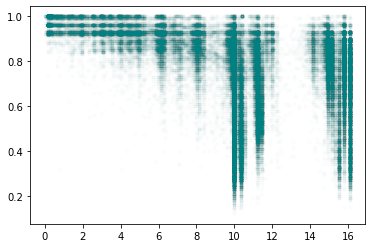

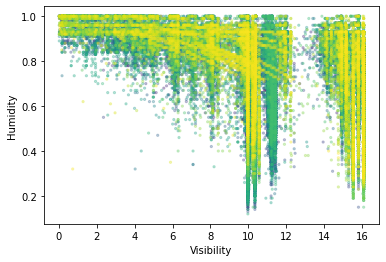

In [81]:
#Setting up scatterplot for 
xy = np.vstack([df['Visibility'], df['Humidity']])
z = gaussian_kde(xy)(xy) #sorting 

idx = z.argsort()
x, y, z = df['Visibility'], df['Humidity'], z[idx]

plt.scatter( df['Visibility'],  df['Humidity'], s=10,c='teal', alpha = 0.01)
#plt.scatter(df['Temperature (C)'], df['Humidity'], s=1,c='green')

fig, ax = plt.subplots()
ax.scatter(df['Visibility'], df['Humidity'], c=z, s=5, alpha = 0.3)

plt.xlabel('Visibility')
plt.ylabel('Humidity')
plt.show()   # TAKES A MINUTE OR SO TO RENDER

Below we can see that the only datapoints with humidity under 0.12 all had a humidity of exactly zero. We can assume this is an error. The number of such datapoints is inconsequential given the size of the overall dataset so I decided to remove them.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

temp = df.iloc[:, 3:4].values   # Loading Temperature values   X is temp  X_train is tempTrain X_test is tempTest
hum = df.iloc[:, 5].values   # Loading Humidity values       Y is hum   y_train is humTrain  y_test is humTest

tempTrain, tempTest, humTrain, humTest = train_test_split(temp, hum, test_size=0.3, shuffle=True, random_state=42)

In [130]:
lin_reg = LinearRegression()
lin_reg.fit(tempTrain, humTrain)

LinearRegression()

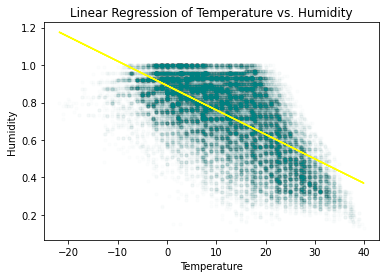

In [133]:
plt.scatter(tempTrain, humTrain, s=10,c='teal', alpha = 0.01)
plt.plot(tempTrain, lin_reg.predict(tempTrain), color = 'yellow')
plt.title('Linear Regression of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

In [144]:
humidityPredictor = lin_reg.predict(tempTest)
print(lin_reg.coef_)  #Getting the gradient
print(lin_reg.intercept_) #Getting the y-intercept
print("M.S.E. = ",mean_squared_error(humTest, humidityPredictor))
print("R^2 = ",r2_score(humTest, humidityPredictor))

[-0.01304842]
0.8905350492598881
M.S.E. =  0.022942296836926064
R^2 =  0.3958628579936535


Fitting a polynomial instead to see if we can improve on our M.S.E and R^2 values.

In [145]:
#setting up the model for polynomial regression
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree = 4)
polyTemp = poly_reg.fit_transform(tempTrain)
poly_reg.fit(polyTemp, humTrain)
linearReg2 = LinearRegression()
linearReg2.fit(polyTemp, humTrain)

LinearRegression()

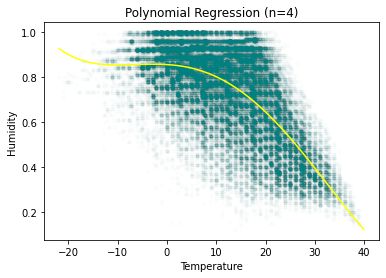

In [146]:
X_grid = np.arange(min(tempTrain), max(tempTrain), 0.1) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(temp, hum, s=10,c='teal', alpha = 0.01)
plt.plot(X_grid, linearReg2.predict(poly_reg.fit_transform(X_grid)), color = 'yellow')
plt.title('Polynomial Regression (n=4)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

In [148]:
humidityPolyPredictor = lin_reg_2.predict(poly_reg.fit_transform(tempTest))
print(linearReg2.coef_)  #getting coefficients for polynomial equation
print(linearReg2.intercept_)  #getting the y-intercept for the polynomial equation
print("M.S.E. = ",mean_squared_error(humTest, humidityPolyPredictor))
print("R^2 = ",r2_score(humTest, humidityPolyPredictor))

[ 0.00000000e+00 -1.32603820e-03 -3.03235554e-04 -1.26552202e-05
  2.39305537e-07]
0.8560734995136003
MSE =  0.020275532058604377
R2 =  0.4660865005099236
